In [1]:
import json
import csv
from nltk.tokenize import word_tokenize
import string
import re
import time
import pandas as pd

import numpy as np
import itertools
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import joblib



from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant

# Pre Process

In [2]:
def getdata(dataurl):
    print()
    print("Retrieving TXT File....")
    tweets_data_path = dataurl
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    print()
    print("Successfull Retrieved from txt file......")
    print()
    time.sleep(3)
    return tweets_data
#     processdata()


def processdata(tweet_data):
    print()
    print("Recovering Data Teets.....")
    print()
    time.sleep(1)
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#     print(RE_EMOJI)
    for i in range(len(tweets_data)):
        q = tweets_data[i]['text']
        o = tweets_data[i]['id_str']
        q = RE_EMOJI.sub(r'', q)
        i = q.translate(str.maketrans('','',string.punctuation))
        x.append(i)
        k.append(o)
    print()
    print("Data Tweets Recovered......")
    print()
    return (x,k)
    
    
    
def readdict(dataurl):
    print()
    print("Reading Dictionary......")
    print()  
    with open(dataurl) as tsvfile:
      reader = csv.reader(tsvfile, delimiter='\t')
      for row in reader:
          i = []
          i.append(row[2])
          i.append(row[5])
          y.append(i)
    print()
    print("Dictionary Preparation Done .........")
    print()  
    return y
#     addpolarity()

def addSentimentpolarity(x,y,negvalue):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    sa = SentimentIntensityAnalyzer() 
    some_milby_t=[]
    counter=0
    start_time = time.time()
    for j in x:
        temp_sentiment = sa.polarity_scores(j)
        sum_more= 0
        if temp_sentiment['compound']<= negvalue:
            sum_more=1
        sum_var = []    
        varid = x[counter]
        sum_var.append(varid)
        sum_var.append(sum_more)
        some_milby_t.append(sum_var)
        counter += 1
    print('Done with finding the sentiments.........')
    print("Processing time: ", round((time.time() - start_time),8), "Seconds \n\n")
    return some_milby_t
        
def addpolarity(x,y):
    start_time = time.time()
    counter = 0
    print()
    print("Processing please wait...")
    print()
    for j in x:
            tweet_token = j
            token = word_tokenize(tweet_token)
            sumnum = 0
            sum_word = 0
            for t in token:
     
                for d in y:
                    if t == d[0]:
                        sentiment = d[1]
                        if sentiment == "positive":
                            sumnum += 1
                            sum_word += 1

                        elif sentiment == "negative":
                            sumnum += -1
                            sum_word += 1

                        else:
                            sumnum += 0
                            sum_word += 1


                        break
                 
            
            if sum_word != 0.0:
                sum_more = sumnum / sum_word
                if sum_more >= 0.2:
                    sum_more = 1
   
                elif (sum_more < 0.2) and (sum_more > -0.5):
                    sum_more = 0
                   
                elif sum_more <= -0.5:
                    sum_more = -1
                   
                else:
                    print("****")
                    
                
            sum_var = []    
            varid = k[counter]
            sum_var.append(varid)
            sum_var.append(sum_more)
            some_milby.append(sum_var)
            counter += 1
            
    print("Processing time: ", round((time.time() - start_time),8), "Seconds \n\n")
    time.sleep(3)
    print()
    print("Processing Finish..........")
    print()
    return some_milby
#     savetoxlsx()
    
def savetoxlsx(some_milby):
    df = pd.DataFrame(some_milby)
    df.to_excel('processed_data/output.xlsx', header=("id","sentiment"), index=False)
    #file = open("testfile_data.txt","w") 
    #file.write(some_milby) 
    #file.close() 
    print("===========================")
    print("Data Saved!............")
    print("===========================") 

In [41]:
# For checking out and verifying the data given by AMit


# def findWords(text,wordlist):
#     words = text.split(' ')
#     for word in words:
#         word = word.strip()
#         label = 1 if word in wordlist else 0
#     return label


# def preProcessText(text_data):
#     print()
#     print("Processing.....")
#     print()
#     time.sleep(1)
#     x=[]
#     RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
# #     print(RE_EMOJI)
#     for i in range(len(text_data)):
#         q = text_data[i]
#         q = RE_EMOJI.sub(r'', q)
#         i = q.translate(str.maketrans('','',string.punctuation))
#         x.append(i)
#     print()
#     print("Completed the processing of the text......")
#     print()
#     return x

# def findLabels(x,negvalue,formed_list):
#     from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#     sa = SentimentIntensityAnalyzer() 
#     s_label = []
#     w_label = []
#     counter=0
#     start_time = time.time()
#     for text in x:
#         temp_sentiment = sa.polarity_scores(text)
#         sum_more= 0
#         if temp_sentiment['compound']<= negvalue:
#             sum_more=1
#         s_label.append(sum_more)
#         w_label.append(findWords(text,formed_list))
#         counter += 1
    
#     print('Done with finding the sentiments.........')
#     print("Processing time: ", round((time.time() - start_time),8), "Seconds \n\n")
#     return (s_label,w_label)


# formed_list = ['depressed','suicide','die','anxiety','depress','alone','hate','kill']

# datatemp = pd.read_csv('depression_dataset.csv')
# xdata = datatemp['Post']
# processed_xdata = preProcessText(xdata)
# ydata = datatemp['Depressed']
# sentiment_label, word_found_label = findLabels(xdata,-0.5,formed_list)



# s_label_np = np.array(sentiment_label).astype(int)
# w_label_np = np.array(word_found_label).astype(int)
# annoted_label_np = np.array(ydata).astype(int)

# print('\nTotal no of samples = ',len(annoted_label_np))
# print('\nNo of samples that have sentiment label matching with annoted label',np.sum(s_label_np==annoted_label_np))
# print('\nNo of samples that have word label matching with annoted label',np.sum(w_label_np==annoted_label_np))
# print('\nNo of samples that have sentiment label matching with word label',np.sum(s_label_np==w_label_np))

# cond1 = s_label_np==annoted_label_np
# cond2 = w_label_np==annoted_label_np
# print('\nNo of samples that have every label matching = ',np.sum((cond1==True)==(cond2==True)))


Processing.....


Completed the processing of the text......

Done with finding the sentiments.........
Processing time:  2.98026109 Seconds 



Total no of samples =  13636

No of samples that have sentiment label matching with annoted label 7607

No of samples that have word label matching with annoted label 6657

No of samples that have sentiment label matching with word label 11838

No of samples that have every label matching =  11838


In [39]:
#

In [40]:
# def printSameples(x,label1,label2,label1_text,label2_text,condition):
#     print('Printing the samples....\n')
#     indices = label1==label2
#     print('Total no of samples = ',np.sum(indices),'\n')
#     for i in range(len(indices)):
#         if indices[i]==condition:
#             print(label1_text,label1[i])
#             print(label2_text,label2[i])
#             print(x[i])
#             print()

# printSameples(xdata,s_label_np,annoted_label_np,'Sentiment Label','Annoted Label',False)

In [191]:
tweets_data = []
x = []
y = []
k = []
some_milby = []
print('Starting Pre processing......')
print()

tweets_data = getdata('data/tweetdata.txt')
x,k = processdata(tweets_data)

Starting Pre processing......


Retrieving TXT File....

Successfull Retrieved from txt file......


Recovering Data Teets.....


Data Tweets Recovered......



In [192]:
import nltk
nltk.download('punkt')
# y = readdict('data/dictionary.tsv')
# some_milby=addpolarity(x,y)
some_milby_sentiments =  addSentimentpolarity(x,y,-0.5)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/hokagehimanshu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Done with finding the sentiments.........
Processing time:  2.42073059 Seconds 




In [193]:
# savetoxlsx(some_milby)
savetoxlsx(some_milby_sentiments)

Data Saved!............


# Training

In [3]:
def preProcessText(text_data):
    from nltk.corpus import stopwords  
    from nltk.tokenize import word_tokenize  
    stop_words = set(stopwords.words('english'))      
            
    print()
    print("Processing.....")
    print()
    time.sleep(1)
    x=[]
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#     print(RE_EMOJI)
    for i in range(len(text_data)):
        q = text_data[i]
        q = RE_EMOJI.sub(r'', q)
        i = q.translate(str.maketrans('','',string.punctuation))
        
#         word_tokens = word_tokenize(i)
#         filtered_sentence = [w for w in word_tokens if not w in stop_words]
#         i =''
#         for word in filtered_sentence:
#             i+=word+' '
#         i = i.strip()
        x.append(i)
    print()
    print("Completed the processing of the text......")
    print()
    return x

def retrieveTweet(data_url):

    tweets_data_path = data_url
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    return tweets_data

def retrieveProcessedData(tweets_data,Pdata_url):
    sent = pd.read_excel(Pdata_url)
    x=[]
    y=[]
    for i in range(len(tweets_data)):
        if tweets_data[i]['id']==sent['id'][i]:
            x.append(tweets_data[i]['text'])
            y.append(sent['sentiment'][i])
    return (x,y)

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')          
            

def getaccuracy(predictions,actual):
    actual = np.array(actual)
    accuracy = np.count_nonzero((predictions==actual) == True)/len(actual)
    return accuracy*100

def getconfusionmatrix(predictions,actual,classes,title):
    nb_matrix = confusion_matrix(actual, predictions)
    precision = nb_matrix[1][1]/(nb_matrix[1][1]+nb_matrix[0][1])
    recall = nb_matrix[1][1]/(nb_matrix[1][1]+nb_matrix[1][0])
    f1_score = 2*precision*recall/(precision+recall)
    print(title)
    print(nb_matrix)
    print('Recall',recall)
    print('Precison',precision)
    print('F1 score',f1_score)
    print()
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(nb_matrix, classes=classes, title=title)

def nbTrain(x,y,x_test,y_test,vectorizer):
    from sklearn.naive_bayes import MultinomialNB
    start_timenb = time.time()
    train_features = vectorizer.fit_transform(x)
    actual = y

    nb = MultinomialNB()
    nb.fit(train_features, [int(r) for r in y])

    train_predictions = nb.predict(vectorizer.transform(x))
    test_predictions = nb.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual)
    test_accuracy = getaccuracy(test_predictions,y_test)
    #     fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)
    #     nbscore = format(metrics.auc(fpr, tpr))
    #     nbscore = float(nbscore)*100

    #confusion matrix
    #     classes=[-1,0,1]
    classes = [0,1]
    getconfusionmatrix(train_predictions,actual,classes,'Confusion matrix For NB classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For NB classifier for testing dataset')
    print("\n")

    #    test_try= vectorizer.transform(["Lets help those in need, fight anxiety and bring happiness"])
    #    test_try2= vectorizer.transform(["Dont look down at people with anxiety rather give love and respect to all. shout! Equality."])
    #    predictr = nb.predict(test_try)
    #    predictt = nb.predict(test_try2)
    #    print(predictr)
    #    print(predictt)

    #     print("Naive Bayes  Accuracy : \n", nbscore,"%")
    print("Naive Bayes  Accuracy for training dataset: \n", train_accuracy,"%")
    print("Naive Bayes  Accuracy for testing dataset: \n", test_accuracy,"%")
    print(" Completion Speed", round((time.time() - start_timenb),5))
    print()

def datree(x,y,x_test,y_test,vectorizer):
    from sklearn import tree
    start_timedt = time.time()
    train_featurestree = vectorizer.fit_transform(x)
    actual1 = y
    dtree = tree.DecisionTreeClassifier()
    dtree = dtree.fit(train_featurestree, [int(r) for r in y])

    train_predictions = dtree.predict(vectorizer.transform(x))
    test_predictions = dtree.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual1)
    test_accuracy = getaccuracy(test_predictions,y_test)

    # ddd, ttt, thresholds = metrics.roc_curve(actual1, prediction1, pos_label=1)
    # dtreescore = format(metrics.auc(ddd, ttt))
    # dtreescore = float(dtreescore)*100
    classes = [0,1]
    getconfusionmatrix(train_predictions,actual1,classes,'Confusion matrix For DecisionTree classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For DecisionTree classifier for testing dataset')
    print("\n")

    #     print("Decision tree Accuracy : \n", dtreescore, "%")
    print("Decision tree Accuracy for training datatset: \n", train_accuracy, "%")
    print("Decision tree Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timedt),5))
    print()

def svm(x,y,x_test,y_test,vectorizer):
    from sklearn.svm import SVC
    start_timesvm = time.time()
    train_featuressvm = vectorizer.fit_transform(x)
    actual2 = y
    svc = SVC()
    svc = svc.fit(train_featuressvm, [int(r) for r in y])

    train_predictions = svc.predict(vectorizer.transform(x))
    test_predictions = svc.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual2)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual2,classes,'Confusion matrix For SVM classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For SVM classifier for testing dataset')
    print("\n")

    # sss, vvv, thresholds = metrics.roc_curve(actual2, prediction2, pos_label=1)
    # svc = format(metrics.auc(sss, vvv))
    # svc = float(svc)*100
    print("Support vector machine Accuracy for training datatset: \n", train_accuracy, "%")
    print("Support vector machine Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timesvm),5))
    print()

def knN(x,y,x_test,y_test,vectorizer):
    from sklearn.neighbors import KNeighborsClassifier
    start_timekn = time.time()
    train_featureskn = vectorizer.fit_transform(x)
    actual3 = y
    test_features3 = vectorizer.transform(x)
    kn = KNeighborsClassifier(n_neighbors=2)
    kn = kn.fit(train_featureskn, [int(i) for i in y])

    train_predictions = kn.predict(vectorizer.transform(x))
    test_predictions = kn.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual3)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual3,classes,'Confusion matrix For KNN classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For KNN classifier for testing dataset')
    print("\n")

    # kkk, nnn, thresholds = metrics.roc_curve(actual3, prediction3, pos_label=1)
    # kn = format(metrics.auc(kkk, nnn))
    # kn = float(kn)*100

    print("KNN Accuracy for training datatset: \n", train_accuracy, "%")
    print("KNN Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timekn),5))
    print()


def RanFo(x,y,x_test,y_test,vectorizer):
    from sklearn.ensemble import RandomForestClassifier
    start_timerf = time.time()
    train_featuresrf = vectorizer.fit_transform(x)
    actual4 = y
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    rf = rf.fit(train_featuresrf, [int(i) for i in y])

    train_predictions = kn.predict(vectorizer.transform(x))
    test_predictions = kn.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual4)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual4,classes,'Confusion matrix For Random Forest classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For Random Forest classifier for testing dataset')
    print("\n")
    # rrr, fff, thresholds = metrics.roc_curve(actual4, prediction4, pos_label=1)
    # kn = format(metrics.auc(rrr, fff))
    # kn = float(kn)*100

    print("Random Forest Accuracy for training datatset: \n", train_accuracy, "%")
    print("Random Forest Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timerf),5))
    print()
    print()

def mlmodel(x,y,x_test,y_test,mltype,vect):
    start_time = time.time()
    if vect==2:
        vectorizer = CountVectorizer(stop_words='english')
        train_features = vectorizer.fit_transform(x)
        test_features = vectorizer.transform(x_test)
#         test_features = pad_sequences(test_features.toarray().tolist(), maxlen=train_features.shape[1], truncating="post", padding="post")
#         test_features = np.array(test_features)
        print(train_features.shape)
        print(test_features.shape)
    elif vect==1:
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(x)
        MAX_LENGTH=250
        train_features = tokenizer.texts_to_sequences(x)
        train_padded = pad_sequences(train_features, maxlen=MAX_LENGTH, truncating="post", padding="post")
        test_features = tokenizer.texts_to_sequences(x_test)
        test_padded = pad_sequences(test_features, maxlen=MAX_LENGTH, truncating="post", padding="post")
        train_features = np.array(train_padded)
        test_features = np.array(test_padded)
    
    actual = y
    if mltype=='Naive Bayes':
        from sklearn.naive_bayes import MultinomialNB
        model = MultinomialNB()
        model.fit(train_features, [int(r) for r in y])
    elif mltype=='Decision Tree':
        from sklearn import tree
        model = tree.DecisionTreeClassifier()
        model = model.fit(train_features, [int(r) for r in y])
    elif mltype=='SVM':
        from sklearn.svm import SVC
        model = SVC()
        model = model.fit(train_features, [int(r) for r in y])
    elif mltype=='KNN':
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier(n_neighbors=2)
        model = model.fit(train_features, [int(i) for i in y])
    elif mltype=='Random Forest':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(max_depth=2, random_state=0)
        model = model.fit(train_features, [int(i) for i in y])
    elif mltype=='MLPClassifier':
        model = MLPClassifier(activation='logistic',hidden_layer_sizes=(100,50,50))
        model.fit(train_features,[int(i) for i in y])

#     train_predictions = model.predict(vectorizer.transform(x))
#     test_predictions = model.predict(vectorizer.transform(x_test))
    
    train_predictions = model.predict(train_features)
    test_predictions = model.predict(test_features)

    train_accuracy = getaccuracy(train_predictions,actual)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual,classes,'Confusion matrix For '+mltype+' classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For '+mltype+' classifier for testing dataset')
    print("\n")
    # rrr, fff, thresholds = metrics.roc_curve(actual4, prediction4, pos_label=1)
    # kn = format(metrics.auc(rrr, fff))
    # kn = float(kn)*100

    print(mltype," Accuracy for training datatset: \n", train_accuracy, "%")
    print(mltype," Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_time),5))
    print()
    print()
    return [model,mltype,train_accuracy,test_accuracy]


Processing.....


Completed the processing of the text......



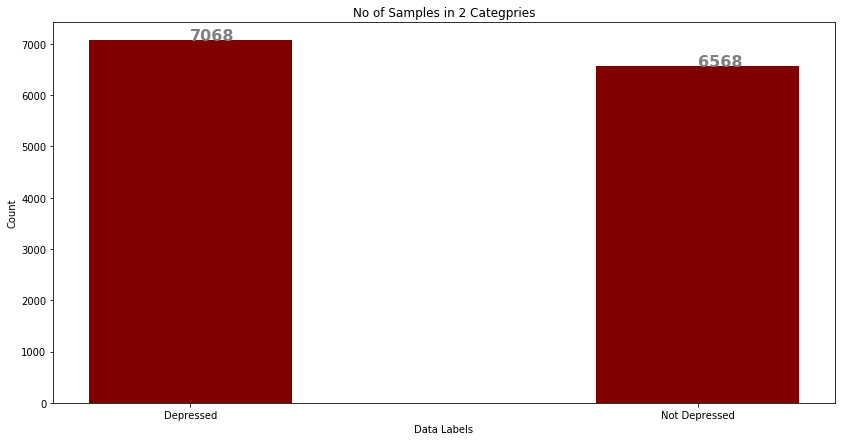

EXPLORING THE DATASET
Total No of tweets are  13636
No of tweets with 1 as true label, i,e as depressed are   7068
No of tweets with 0 as true label, i,e as not depressed are   6568

Printing some examples of tweets showing signs of depression
i’m scared of failing

SelfImprovement Failure

How are you supposed to be arroundwith people when their behaviours make you so invalidated

I need help please

Can triggers disappear during a mania episode Bipolar

My head hurts so bad

My boyfriend has depression How can I exist to help him

Im scared to go out with friends

I thought things couldnt get much worse Well they did

I just had a vivid dream in which I killed myself and lived on as a ghost and saw how it effected my family





Printing some examples of tweets that have ground truth value of not depressed
For all you cookie loving jabronis with way too much time on their hands

One day old mouse deer Also called chevrotains these hoofed mammals eat leaves and fruit live in the fores

In [8]:
def makewordclound(datalist,picname):
    import matplotlib.pyplot as pPlot
    from wordcloud import WordCloud, STOPWORDS
    import numpy as npy
    from PIL import Image
    
    dataset =''
    for i in datalist:
        dataset += i.lower() +'\n'
#     print(dataset)
    maskArray = npy.array(Image.open("cloud.png"))
    cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
    cloud.generate(dataset)
    cloud.to_file(picname)

def visualizeData(x,y,xlabel,ylabel,title):
#     fig, ax= plt.figure(figsize = (10, 5))
    fig, ax = plt.subplots(figsize =(14, 7))
    plt.bar(x, y, color ='maroon',width = 0.4)
    index = 0
    for i in ax.patches: 
        plt.text(index, y[index]+0.3,  
             str(y[index]), 
             fontsize = 16, fontweight ='bold', 
             color ='grey') 
        index+=1
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(title) 
    plt.savefig('DatasetDistribution.png')
    plt.show() 

# understanding datset

tweets_data = []
xt = []
yt = []
tweets_data = retrieveTweet('data/tweetdata.txt')  
xt,yt=retrieveProcessedData(tweets_data,'processed_data/output.xlsx')

df = pd.DataFrame({'tweettext':xt,'label':yt})
df = df.sample(frac = 1)
xt = df['tweettext']
yt = df['label']

x = xt
y = yt 

# xt = preProcessText(xt)

datatemp = pd.read_csv('depression_dataset.csv')
x = datatemp['Post']
y = datatemp['Depressed']

# df = pd.DataFrame({'reddittext':x,'label':y})
# df = df.sample(frac = 1)
# x = df['reddittext']
# y = df['label']

# x.extend(datatemp['Post'].tolist())
# y.extend(datatemp['Depressed'].tolist())

# preprocessing
x = preProcessText(x)

#visualize the dataset
visualizeData(['Depressed', 'Not Depressed'],[np.sum(np.array(y)==1),np.sum(np.array(y)==0)],'Data Labels','Count','No of Samples in 2 Categpries')

# vectorizer = CountVectorizer(stop_words='english')

print('EXPLORING THE DATASET')
print('Total No of tweets are ',len(y))
print('No of tweets with 1 as true label, i,e as depressed are  ',np.count_nonzero(np.array(y) == 1))
print('No of tweets with 0 as true label, i,e as not depressed are  ',np.count_nonzero(np.array(y) == 0))


maxlines=10
df = pd.DataFrame({'tweettext':x,'label':y})
df = df.sample(frac = 1)
print()
print('Printing some examples of tweets showing signs of depression')
dep_df = df.loc[df['label'] == 1]
# print(dep_df['tweettext'])
makewordclound(dep_df['tweettext'],"DepressionWordCloud.png")
count=0
for index, row in dep_df.iterrows(): 
    print (row["tweettext"])
    print()
    count+=1
    if count==maxlines:
        break
print('\n\n')
dep_df.to_csv('generated/depressedexamples.csv',index=False)

print()
print('Printing some examples of tweets that have ground truth value of not depressed')
ndep_df = df.loc[df['label'] == 0]
# print(ndep_df['tweettext'])
makewordclound(ndep_df['tweettext'],"NotDepressionWordCloud.png")
count=0
for index, row in ndep_df.iterrows(): 
    print (row["tweettext"])
    print()
    count+=1
    if count==maxlines:
        break
print('\n\n')
ndep_df.to_csv('generated/notdepressedexamples.csv',index=False)
print('Dividing it into train and test dataset...')
ratio = 0.8
dno = len(dep_df)
ndno = len(ndep_df)

train = pd.concat([dep_df[:int(ratio*dno)], ndep_df[:int(ratio*dno)]], ignore_index=True)
train = train.sample(frac = 1)
x_train = np.array(train['tweettext'])
y_train = np.array(train['label'])

test = pd.concat([dep_df[int(ratio*dno):], ndep_df[int(ratio*dno):]], ignore_index=True)
test = test.sample(frac = 1)
x_test = np.array(test['tweettext'])
y_test = np.array(test['label'])

print('Length of training dataset ',len(train))
print('Length of testing dataset ',len(test))




# asssigning the dataset

# train on reddit and test on twitter  
# train = 9000
# test = 4000

# x_train = x[0:train]
# y_train = y[0:train]

# x_test = xt[0:test]
# y_test = yt[0:test]


# x_val = x[train:train+test]
# y_val = y[train:train+test]


# Using the ML Models

In [172]:
# running different models
# nbTrain(x_train,y_train,x_test,y_test,vectorizer)
# datree(x_train,y_train,x_test,y_test,vectorizer)
# svm(x_train,y_train,x_test,y_test,vectorizer)
# knN(x_train,y_train,x_test,y_test,vectorizer)
# RanFo(x_train,y_train,x_test,y_test,vectorizer)

Confusion matrix For Naive Bayes classifier for training dataset
[[1978 3676]
 [ 501 5153]]
Recall 0.9113901662539795
Precison 0.5836448068863971
F1 score 0.7115929020230615



Confusion matrix For Naive Bayes classifier for testing dataset
[[ 300  614]
 [ 137 1277]]
Recall 0.9031117397454032
Precison 0.6753040719196193
F1 score 0.772768532526475



Naive Bayes  Accuracy for training datatset: 
 63.061549345596035 %
Naive Bayes  Accuracy for testing datatset: 
 67.7405498281787 %
 Completion Speed 0.87584


Confusion matrix For Decision Tree classifier for training dataset
[[5651    3]
 [   4 5650]]
Recall 0.9992925362575168
Precison 0.9994693083318592
F1 score 0.9993809144777571



Confusion matrix For Decision Tree classifier for testing dataset
[[ 579  335]
 [ 411 1003]]
Recall 0.7093352192362093
Precison 0.749626307922272
F1 score 0.7289244186046513



Decision Tree  Accuracy for training datatset: 
 99.93809692253272 %
Decision Tree  Accuracy for testing datatset: 
 67.95532646048

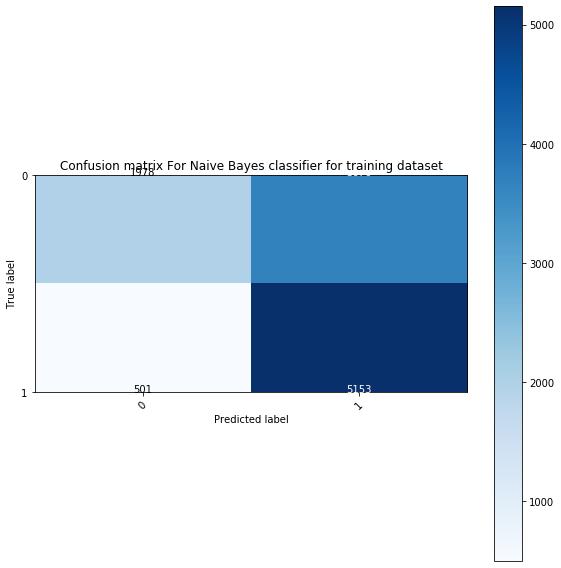

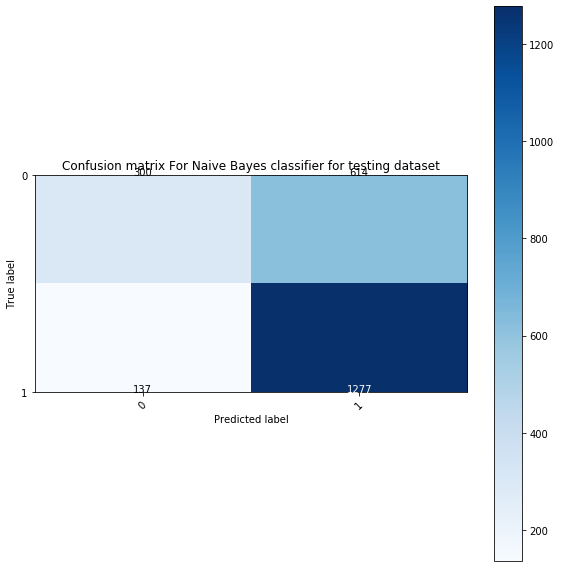

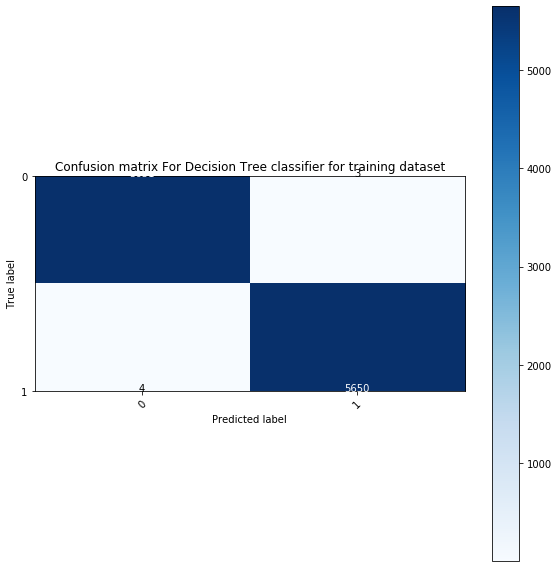

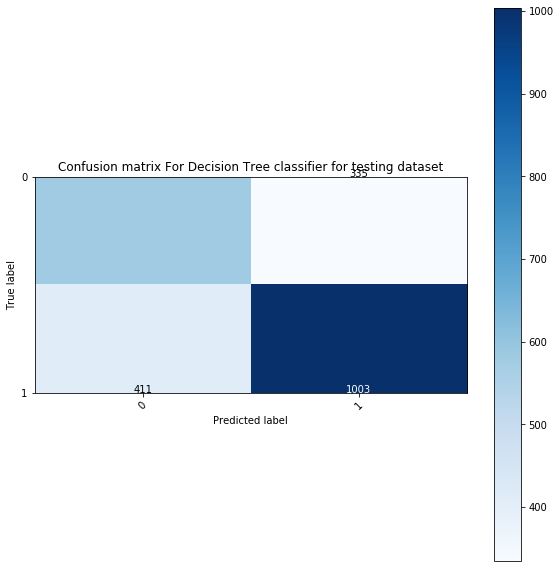

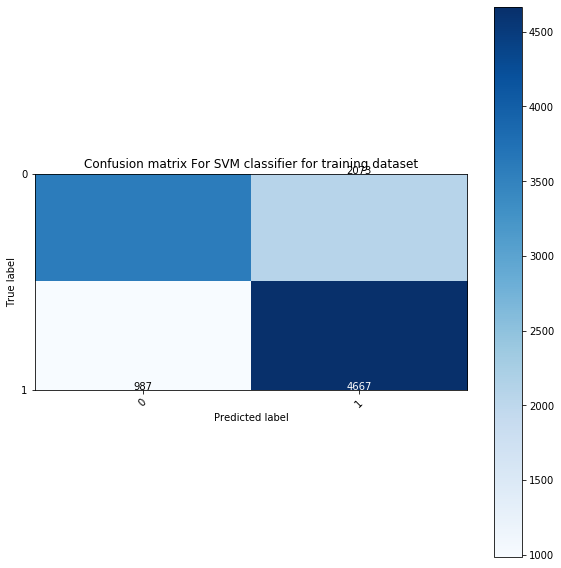

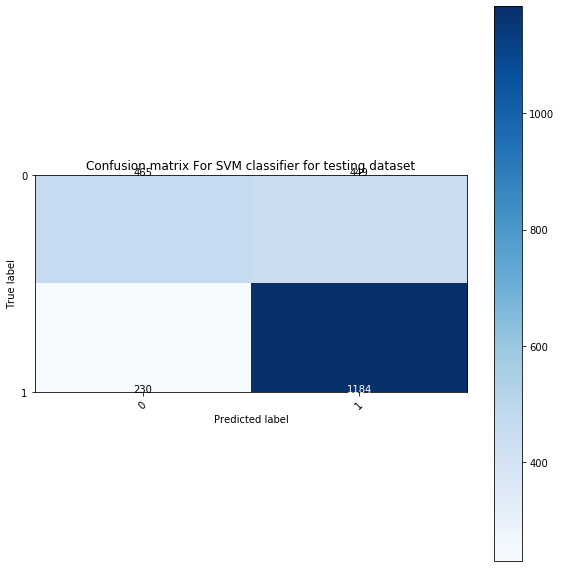

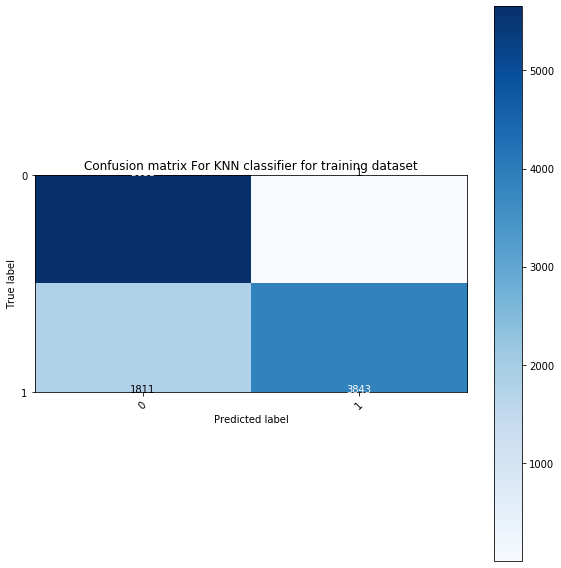

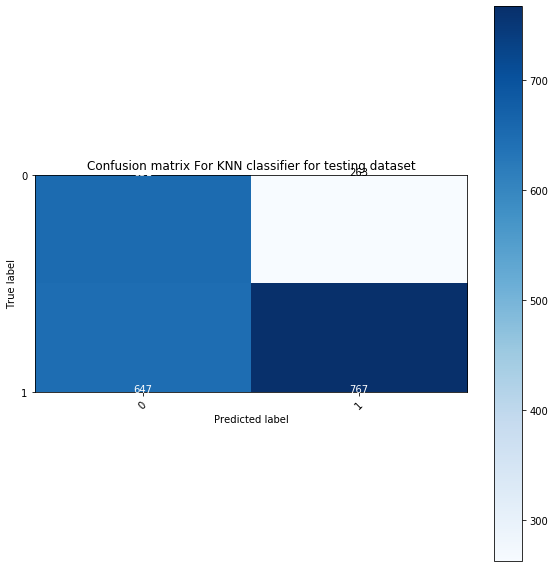

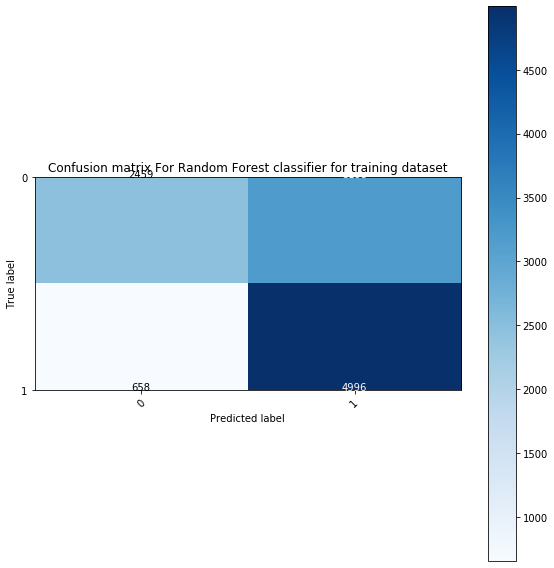

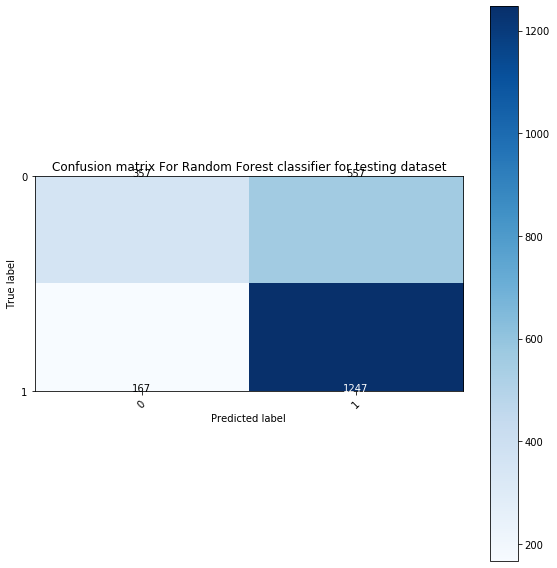

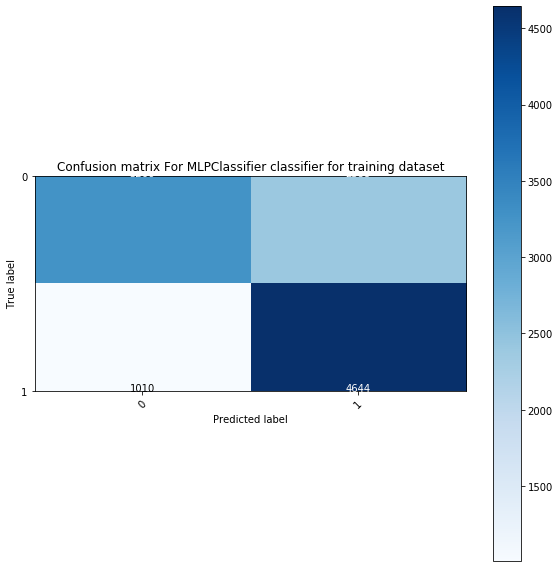

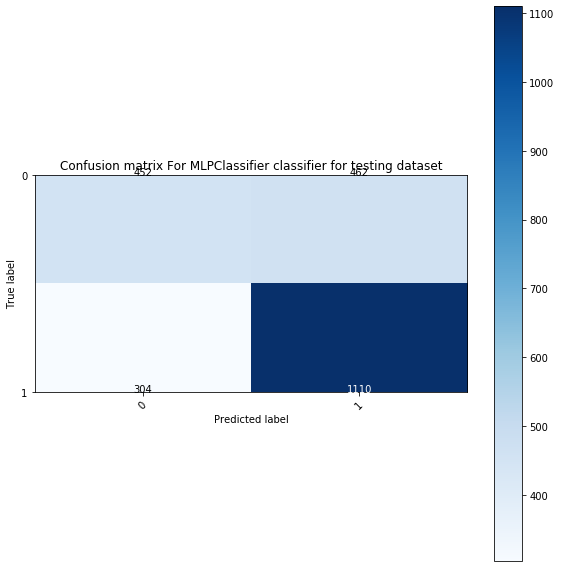

In [79]:
tokenizer_choice = 1 # 1 for Tokenizer, 2 for CountVectorizer
tokenizer_name = 'Tokenizer' if tokenizer_choice==1 else 'Count Tokenizer'

analysis=[]
mltype_list =['Naive Bayes','Decision Tree','SVM','KNN','Random Forest','MLPClassifier']
for t in mltype_list:
    temp = mlmodel(x_train,y_train,x_test,y_test,t,vect=tokenizer_choice)
    analysis.append(temp[1:])

# mlmodel(x,y,x_test,y_test,vectorizer,'Naive Bayes')
# mlmodel(x,y,x_test,y_test,vectorizer,'Decision Tree')
# mlmodel(x,y,x_test,y_test,vectorizer,'SVM')
# mlmodel(x,y,x_test,y_test,vectorizer,'KNN')
# mlmodel(x,y,x_test,y_test,vectorizer,'Random Forest')

In [80]:
analysis_df = pd.DataFrame(analysis,columns=['Model Name','Train Accuracy','Test Accuracy'])
print(analysis_df)
analysis_df.to_csv('generated/analysis_df'+tokenizer_name+'.csv',index=False)
print(tokenizer_name)

# for reddits


      Model Name  Train Accuracy  Test Accuracy
0    Naive Bayes       63.061549      67.740550
1  Decision Tree       99.938097      67.955326
2            SVM       72.939512      70.833333
3            KNN       83.975946      60.910653
4  Random Forest       65.926778      68.900344
5  MLPClassifier       69.950478      67.096220
Tokenizer


In [37]:
analysis_df = pd.DataFrame(analysis,columns=['Model Name','Train Accuracy','Test Accuracy'])
print(analysis_df)
analysis_df.to_csv('generated/analysis_df'+tokenizer_name+'.csv',index=False)


# for count tokenizer for tweet to reddit

      Model Name  Train Accuracy  Test Accuracy
0    Naive Bayes       80.277778         48.400
1  Decision Tree       86.133333         48.825
2            SVM       75.055556         48.250
3            KNN       69.200000         48.275
4  Random Forest       63.100000         48.250
5  MLPClassifier       84.511111         49.375


In [19]:
analysis_df = pd.DataFrame(analysis,columns=['Model Name','Train Accuracy','Test Accuracy'])
print(analysis_df)
analysis_df.to_csv('generated/analysis_df'+tokenizer_name+'.csv',index=False)


# for tokenizer for tweey to reddit

      Model Name  Train Accuracy  Test Accuracy
0    Naive Bayes       53.366667         49.225
1  Decision Tree       86.300000         49.700
2            SVM       66.300000         48.250
3            KNN       71.611111         48.450
4  Random Forest       63.100000         48.250
5  MLPClassifier       63.122222         48.250


In [12]:
analysis_df = pd.DataFrame(analysis,columns=['Model Name','Train Accuracy','Test Accuracy'])
print(analysis_df)
analysis_df.to_csv('generated/analysis_df'+tokenizer_name+'.csv',index=False)


# for count tokenizer

      Model Name  Train Accuracy  Test Accuracy
0    Naive Bayes       75.255556         42.975
1  Decision Tree       99.966667         43.650
2            SVM       90.222222         35.700
3            KNN       92.266667         40.175
4  Random Forest       79.388889         41.075
5  MLPClassifier       81.200000         35.375


In [14]:
analysis_df = pd.DataFrame(analysis,columns=['Model Name','Train Accuracy','Test Accuracy'])
print(analysis_df)
analysis_df.to_csv('generated/analysis_df'+tokenizer_name+'.csv',index=False)


# for tokenizer

      Model Name  Train Accuracy  Test Accuracy
0    Naive Bayes       75.255556         42.975
1  Decision Tree       99.966667         38.325
2            SVM       90.222222         35.700
3            KNN       92.266667         40.175
4  Random Forest       79.388889         41.075
5  MLPClassifier       81.855556         39.475


PREDICTIONS

In [ ]:
result = mlmodel(x,y,x_test,y_test,vectorizer,'Decision Tree')
model = result[0]

In [ ]:
text = '5 signs, u have depression'
# text = 'I am just feeling little sad today'
predict = model.predict(vectorizer.transform([text]))

print('Making predictions')
if predict==1:
    print('This is giving signs of Depression')
elif predict==0:
    print('This does not seem like a depressed case')

# Our MODEL

In [91]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant

def create_corpus_tk(train):
    corpus = {}
    for text in train:
        words = [word.lower() for word in word_tokenize(text)]
        for word in words:
            corpus[word] = 1
#         corpus.extend(words)
    return corpus.keys()

def myRNNModel(train_padded,y_train,test_padded,y_test,batch_size,num_epochs):
    model = Sequential()
    model.add(
        Embedding(
            num_words,
            50,
#             embeddings_initializer=Constant(embedding_matrix),
            input_length=MAX_LENGTH,
            trainable=False,))
    model.add(LSTM(100, dropout=0.1))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(train_padded, y_train, validation_data=(test_padded, y_test), batch_size=batch_size, epochs=num_epochs)
    scores = model.evaluate(test_padded, y_test, verbose=0)
    print('Test accuracy:', scores[1])
    return (model,history,scores[1])


tokenizer_choice = 2 # 1 for Tokenizer, 2 for CountVectorizer

MAX_LENGTH = 250

corpus = create_corpus_tk(x_train)
num_words = len(corpus)
print('Num of words = ',num_words)

if tokenizer_choice==1:
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(x_train)
    train_sequences = tokenizer.texts_to_sequences(x_train)
    test_sequences = tokenizer.texts_to_sequences(x_val)
    
else:
    vectorizer = CountVectorizer(min_df=0.005,max_features=250)
    train_features = vectorizer.fit_transform(x_train)
    test_features = vectorizer.transform(x_val)
    train_features = train_features.toarray().tolist()
    test_features = test_features.toarray().tolist()
#     MAX_LENGTH = len(train_features[1])

# print('xtrain = ',x_train.shape)
# print('train features = ',train_features.shape)
# print('test_features = ',test_features.shape)

train_padded = pad_sequences(train_features, maxlen=MAX_LENGTH, truncating="post", padding="post")
test_padded = pad_sequences(test_features, maxlen=MAX_LENGTH, padding="post", truncating="post")

y_test = np.array(y_test)
y_train = np.array(y_train)

batch_size = 64
num_epochs = 10

model,history,acc = myRNNModel(train_padded,y_train,test_padded,y_test,batch_size,num_epochs)

tokenizer_name = 'Tokenizer' if tokenizer_choice==1 else 'Count Tokenizer'
print('Accuracy of RNN with ',tokenizer_name,' is ...')
print(acc)


# scores = model.evaluate(test_padded, y_test, verbose=0)
# print

Num of words =  12664
Epoch 1/10
86/86 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4919

ValueError: Data cardinality is ambiguous:
  x sizes: 4000
  y sizes: 3827
Make sure all arrays contain the same number of samples.

PREDICTOIONS

In [39]:
model.predict(y_test)

array([[0.5010647 ],
       [0.50046563],
       [0.5010647 ],
       ...,
       [0.50046563],
       [0.5010647 ],
       [0.50046563]], dtype=float32)